## Job Posting Efficacy

#### Views vs. Applications: Investigate the ratio of views to applications. Which job postings have the highest conversion rates? What factors contribute to their success?
#### Expiry of Job Postings: Analyze how quickly job postings are filled based on their expiry dates. Do certain roles get filled faster than others?

In [1]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\modified_job_industries.csv')


In [2]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int64  
 1   company_name          35564 non-null  object 
 2   title                 35564 non-null  object 
 3   description           35564 non-null  object 
 4   pay_period            35564 non-null  object 
 5   location              35564 non-null  object 
 6   company_id            35564 non-null  int64  
 7   views                 35564 non-null  int64  
 8   formatted_work_type   35564 non-null  object 
 9   applies               35564 non-null  int64  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  object 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

In [3]:
# Calculate the conversion rate
postings['conversion_rate'] = postings['applies'] / postings['views']

In [6]:
# Display the top job postings by conversion rate
top_conversions = postings.sort_values(by='conversion_rate', ascending=False).head(10)

In [7]:
top_conversions[['job_id', 'title', 'company_name', 'views', 'applies', 'conversion_rate']]

,job_id,title,company_name,views,applies,conversion_rate
17267,-393009163,Global Digital Product Manager,ManpowerGroup,2,2,1.000000
16547,-393025259,Customer Service Representative,Acro Service Corp,3,3,1.000000
6878,-403892022,Executive Assistant,Insight Global,1,1,1.000000
17487,-393003787,Marketing Representative,Chase Title Solutions,1,1,1.000000
33822,-388892721,Senior Oracle Database Administrator (Senior I...,City of Phoenix,1,1,1.000000
8887,-400067908,Sales And Marketing Representative,Ethos Consulting Group,1,1,1.000000
7536,-403688945,DevOps Developer,Comrise,12,8,0.666667
30641,-389660632,Legal Recruiting Assistant,Mission Staffing,3,2,0.666667
10524,-396808392,AP Specialist (Remote),Vaco,6,4,0.666667
14164,-393611111,Package Handler - Part Time (Warehouse like),FedEx Ground,13,8,0.615385


C:\Users\My Account\AppData\Local\Temp\ipykernel_5924\2829511112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='conversion_rate', y='title', data=top_conversions, palette='viridis')


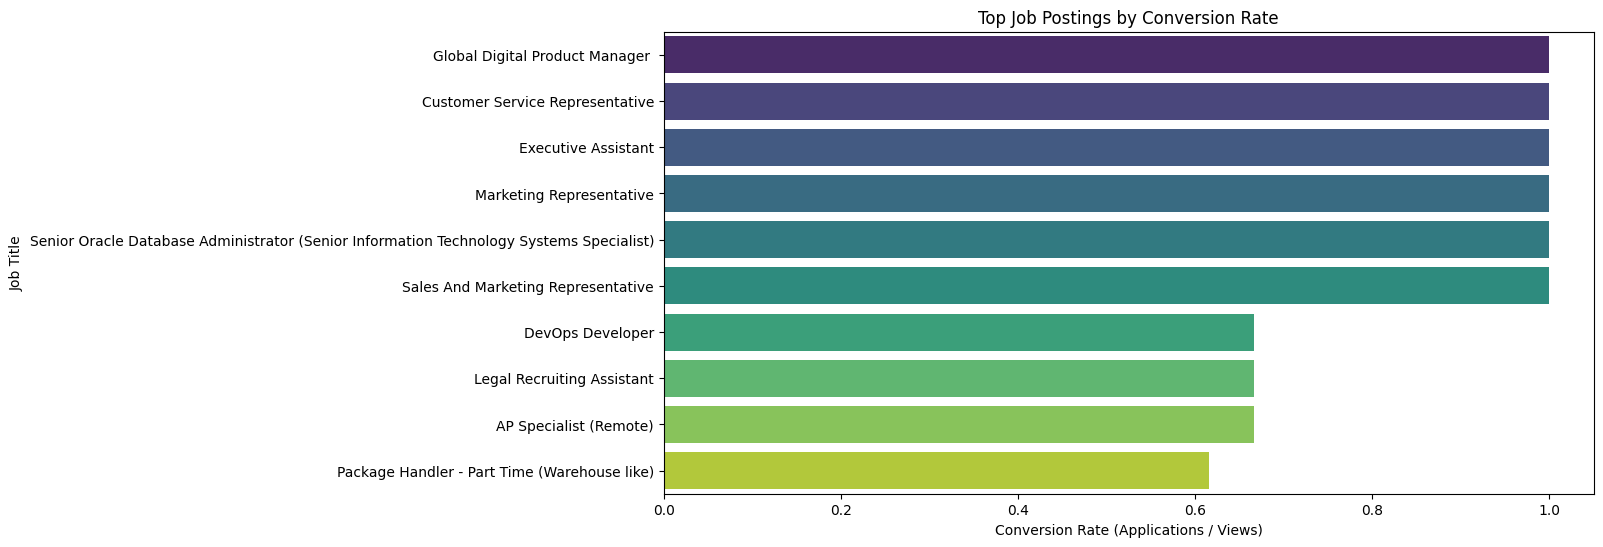

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the conversion rates of the top job postings
plt.figure(figsize=(12, 6))
sns.barplot(x='conversion_rate', y='title', data=top_conversions, palette='viridis')
plt.title("Top Job Postings by Conversion Rate")
plt.xlabel("Conversion Rate (Applications / Views)")
plt.ylabel("Job Title")
plt.show()


In [10]:
postings['expiry'] = pd.to_datetime(postings['expiry'])
postings['original_listed_time'] = pd.to_datetime(postings['original_listed_time'])

In [11]:
# Calculate time until expiry
postings['time_until_expiry'] = (postings['expiry'] - postings['original_listed_time']).dt.days


In [12]:
# Group by job title and calculate average time until expiry
avg_time_to_fill = postings.groupby('title')['time_until_expiry'].mean().reset_index()

# Sort by average time until expiry
avg_time_to_fill.sort_values(by='time_until_expiry', ascending=True, inplace=True)


C:\Users\My Account\AppData\Local\Temp\ipykernel_5924\808861478.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




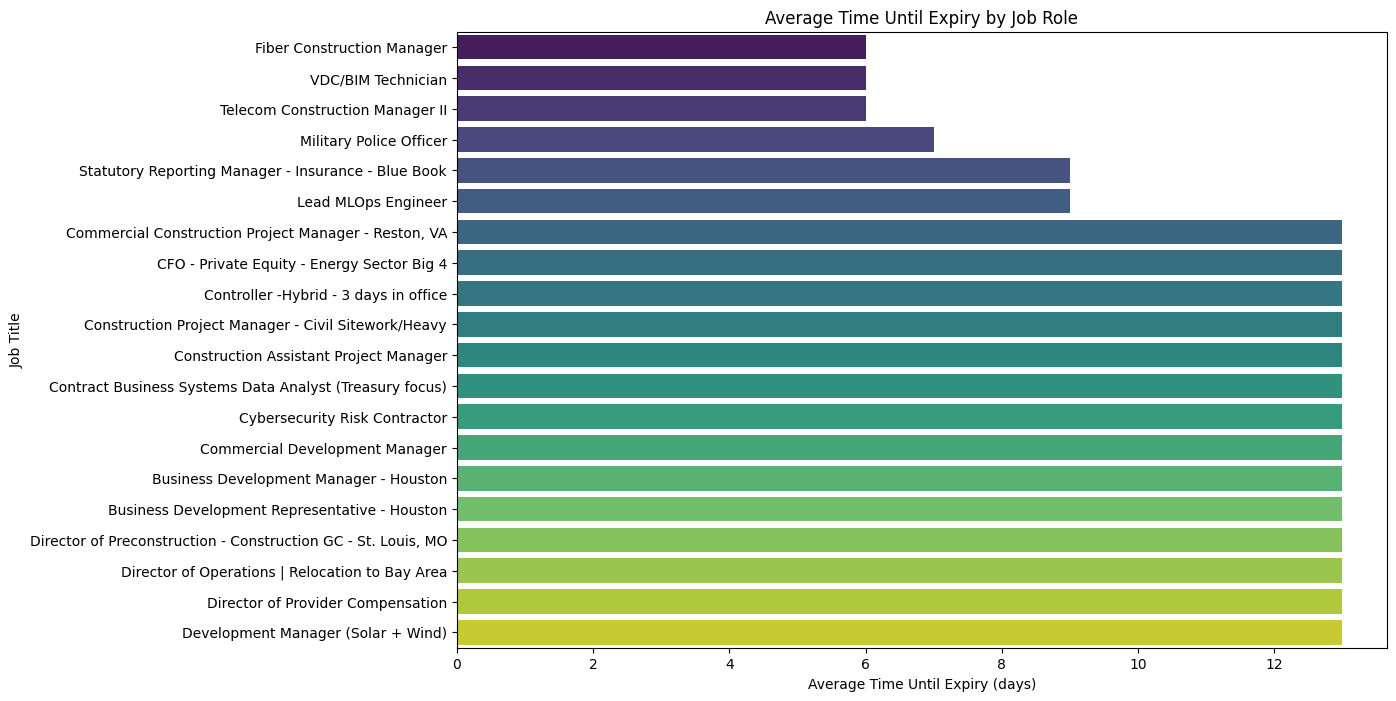

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='time_until_expiry', y='title', data=avg_time_to_fill.head(20), palette='viridis')  # Show top 20 roles
plt.title('Average Time Until Expiry by Job Role')
plt.xlabel('Average Time Until Expiry (days)')
plt.ylabel('Job Title')
plt.show()


In [14]:
avg_time_to_fill_by_title = postings.groupby('title')['time_until_expiry'].mean().reset_index()

# Sort by average time until expiry
avg_time_to_fill_by_title.sort_values(by='time_until_expiry', ascending=True, inplace=True)

In [16]:
import pandas as pd
import plotly.express as px

# Create an interactive bar chart
fig = px.bar(
    avg_time_to_fill_by_title.head(20),  # Show top 20 roles
    x='time_until_expiry',
    y='title',
    title='Average Time Until Expiry by Job Role',
    labels={'time_until_expiry': 'Average Time Until Expiry (days)', 'title': 'Job Title'},
    hover_data={'time_until_expiry': True},  # Show time until expiry on hover
    color='time_until_expiry',  # Color by time until expiry for visual emphasis
    color_continuous_scale=px.colors.sequential.Plasma,  # Change color scale to Plasma
)

# Update layout for better aesthetics
fig.update_layout(
    title_font=dict(size=24, color='darkblue', family='Arial Black'),  # Title font customization
    xaxis_title_font=dict(size=18, color='black'),  # X-axis title font
    yaxis_title_font=dict(size=18, color='black'),  # Y-axis title font
    legend_title_font=dict(size=16),  # Legend title font
    margin=dict(l=40, r=40, t=80, b=40),  # Margins for better spacing
    paper_bgcolor='rgba(240, 240, 240, 1)',  # Light grey background
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White plot background
)

# Customize the bar mode and opacity
fig.update_traces(
    marker=dict(line=dict(width=2, color='black'), opacity=0.8)  # Add borders and set opacity
)

# Show the figure
fig.show()
